# **AML_Assignment-2_Convolution**
**Sushma Chiluveru**



**Uploading Kaggle API JSON File by creating a token and Downloading Dogs vs Cats dataset from Kaggle website**


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"chiluverusushma","key":"6ca0632035ecba498140262fbc039094"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

100% 810M/812M [00:51<00:00, 17.6MB/s]
100% 812M/812M [00:51<00:00, 16.6MB/s]


### Q1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?




**Organizing and copying data into separate directories for testing, training, and validation**

In [5]:
import os, shutil, pathlib
o_dir = pathlib.Path("train")
n_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = n_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)

        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src = o_dir / fname
            dst = dir / fname
            shutil.copyfile(src, dst)

make_subset("train", start_index=500, end_index=1500)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)

**Constructing a simple convolutional neural network model for classifying dogs and cats.**

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(n_dir / "train",image_size=(180, 180),batch_size=32)

valid_data = image_dataset_from_directory(n_dir / "validation",image_size=(180, 180),batch_size=32)

test_data= image_dataset_from_directory(n_dir / "test",image_size=(180, 180),batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


**Generate a dataset instance with 1000 random samples, each having a vector size of 16, using a NumPy array.**

In [7]:
import numpy as np
import tensorflow as tf

ran_num = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(ran_num)
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
       break

batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
       break

reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
       break

(16,)
(16,)
(16,)
(32, 16)
(32, 16)
(32, 16)
(4, 4)
(4, 4)
(4, 4)


**Displaying the dimensions of the data and labels generated by the Dataset.**


In [8]:
for dataset_batch, label_batch in train_data:
    print("data batch shape:", dataset_batch.shape)
    print("labels batch shape:", label_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Identifying a small convolution for dogs vs. cats categories**

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

input_1000 = keras.Input(shape=(180, 180, 3))
d_1000 = layers.Rescaling(1./255)(input_1000)
d_1000 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(d_1000)
d_1000 = layers.MaxPooling2D(pool_size=2)(d_1000)
d_1000 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(d_1000)
d_1000 = layers.MaxPooling2D(pool_size=2)(d_1000)
d_1000 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(d_1000)
d_1000 = layers.MaxPooling2D(pool_size=2)(d_1000)
d_1000 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(d_1000)
d_1000 = layers.MaxPooling2D(pool_size=2)(d_1000)
d_1000 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(d_1000)
d_1000 = layers.Flatten()(d_1000)
d_1000 = layers.Dropout(0.5)(d_1000)
output_1000 = layers.Dense(1, activation="sigmoid")(d_1000)
model_1000 = keras.Model(inputs=input_1000, outputs=output_1000)

**Model Training**

In [10]:
model_1000.compile(loss="binary_crossentropy",
optimizer="adam",
metrics=["accuracy"])

**The training dataset is utilized to train the model once it's constructed. The validation dataset is employed to assess the model's performance after each epoch. To minimize the execution time per epoch, I am using a GPU.**

In [11]:
model_1000.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

**Model Fitting**

In [12]:
callback_1000 = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras",save_best_only=True,monitor="val_loss")]

history_1000 = model_1000.fit(train_data,epochs=100,validation_data=valid_data,callbacks=callback_1000)

Epoch 1/100
63/63 [==============================] - 16s 130ms/step - loss: 0.6990 - accuracy: 0.4985 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 5s 80ms/step - loss: 0.6935 - accuracy: 0.5065 - val_loss: 0.6900 - val_accuracy: 0.5560
Epoch 3/100
63/63 [==============================] - 7s 108ms/step - loss: 0.6864 - accuracy: 0.5510 - val_loss: 0.6742 - val_accuracy: 0.5800
Epoch 4/100
63/63 [==============================] - 5s 64ms/step - loss: 0.6792 - accuracy: 0.5660 - val_loss: 0.6747 - val_accuracy: 0.5950
Epoch 5/100
63/63 [==============================] - 4s 60ms/step - loss: 0.6633 - accuracy: 0.6045 - val_loss: 0.6499 - val_accuracy: 0.6390
Epoch 6/100
63/63 [==============================] - 5s 77ms/step - loss: 0.6296 - accuracy: 0.6480 - val_loss: 0.6378 - val_accuracy: 0.6410
Epoch 7/100
63/63 [==============================] - 6s 95ms/step - loss: 0.6098 - accuracy: 0.6625 - val_loss: 0.6637 - val_accuracy: 0.6320
Epo

**Plot for loss and accuracy during training**





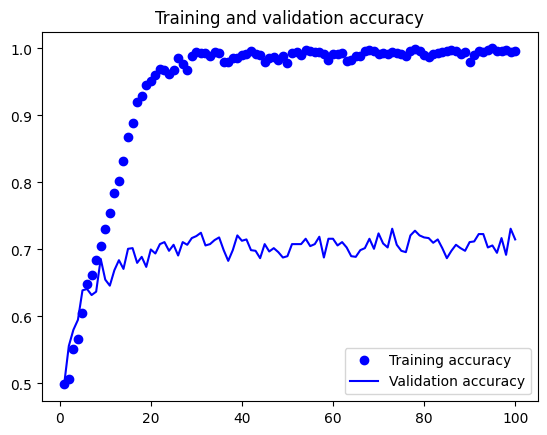

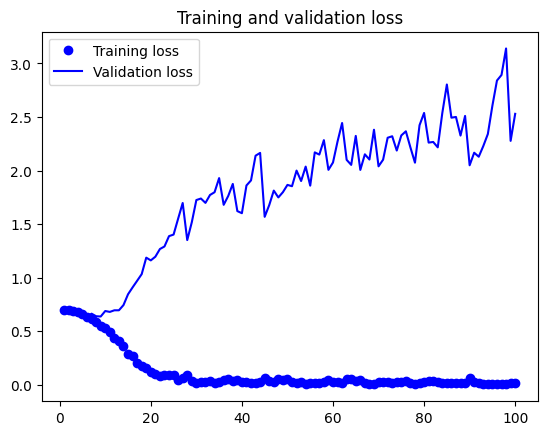

In [13]:
import matplotlib.pyplot as plt

accuracy = history_1000.history["accuracy"]
val_accuracy = history_1000.history["val_accuracy"]
loss = history_1000.history["loss"]
val_loss = history_1000.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Test Accuracy of the model**

In [14]:
test_1000 = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_1000.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 33ms/step - loss: 0.6077 - accuracy: 0.6680
Test accuracy: 0.668


### Q2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?

**Using data augmentation**

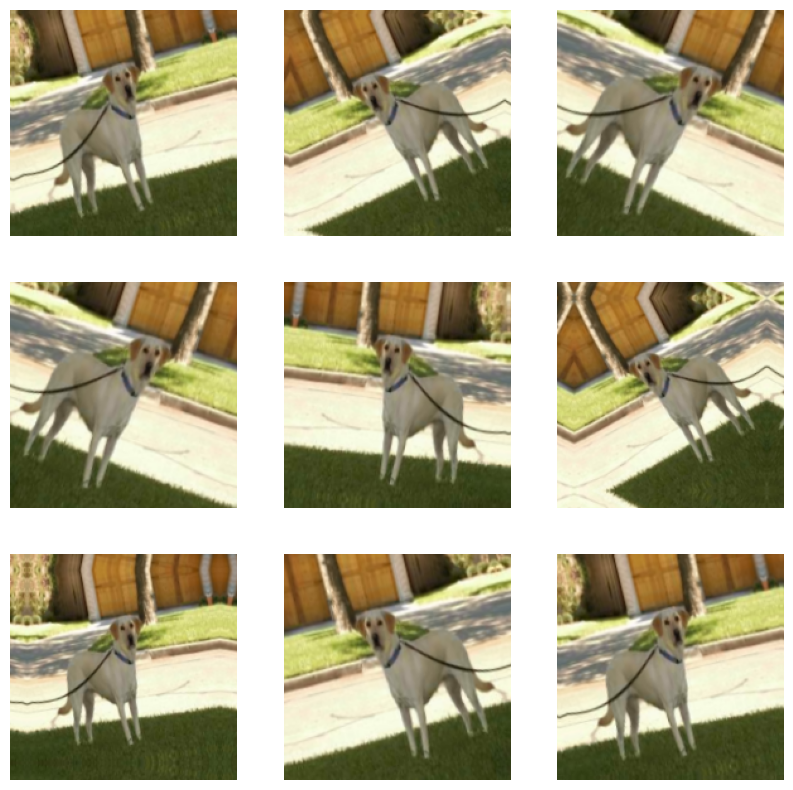

In [15]:
shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)
o_dir = pathlib.Path("train")
n_dir = pathlib.Path("cats_vs_dogs_small_Q2")
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = n_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=o_dir / fname,
            dst=dir / fname)

make_subset("train", start_index=500, end_index=2000)
make_subset("validation", start_index=2000, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

augmentation = keras.Sequential([layers.RandomFlip("horizontal"),layers.RandomRotation(0.1),layers.RandomZoom(0.2),])

plt.figure(figsize=(10, 10))

for images, _ in train_data.take(1):
    for i in range(9):
        augmented_img= augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_img[0].numpy().astype("uint8"))
        plt.axis("off")

**Convolutional neural network with dropout and picture augmentation**

In [16]:
input_1500 = keras.Input(shape=(180, 180, 3))

d_2000 = augmentation(input_1500)
d_2000 = layers.Rescaling(1./255)(d_2000)
d_2000 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(d_2000)
d_2000 = layers.MaxPooling2D(pool_size=2)(d_2000)
d_2000 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(d_2000)
d_2000 = layers.MaxPooling2D(pool_size=2)(d_2000)
d_2000 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(d_2000)
d_2000 = layers.MaxPooling2D(pool_size=2)(d_2000)
d_2000 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(d_2000)
d_2000 = layers.MaxPooling2D(pool_size=2)(d_2000)
d_2000 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(d_2000)
d_2000 = layers.Flatten()(d_2000)
d_2000 = layers.Dropout(0.5)(d_2000)

output_1500 = layers.Dense(1, activation="sigmoid")(d_2000)
model_1500 = keras.Model(inputs=input_1500, outputs=output_1500)

model_1500.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

callback_1500 = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch_with_augmentation_info.keras",save_best_only=True,monitor="val_loss")]

history_1500 = model_1500.fit(train_data,epochs=100,validation_data=valid_data,callbacks=callback_1500)

Epoch 1/100
63/63 [==============================] - 9s 71ms/step - loss: 0.6953 - accuracy: 0.5010 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 5s 78ms/step - loss: 0.6934 - accuracy: 0.4875 - val_loss: 0.6921 - val_accuracy: 0.5970
Epoch 3/100
63/63 [==============================] - 7s 102ms/step - loss: 0.6930 - accuracy: 0.5175 - val_loss: 0.6909 - val_accuracy: 0.5400
Epoch 4/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6836 - accuracy: 0.5690 - val_loss: 0.6815 - val_accuracy: 0.6020
Epoch 5/100
63/63 [==============================] - 8s 117ms/step - loss: 0.6712 - accuracy: 0.5995 - val_loss: 0.6786 - val_accuracy: 0.6050
Epoch 6/100
63/63 [==============================] - 7s 109ms/step - loss: 0.6591 - accuracy: 0.6195 - val_loss: 0.6458 - val_accuracy: 0.6390
Epoch 7/100
63/63 [==============================] - 7s 103ms/step - loss: 0.6526 - accuracy: 0.6225 - val_loss: 0.6640 - val_accuracy: 0.5930
Ep

**Plots for loss and accuracy during training**





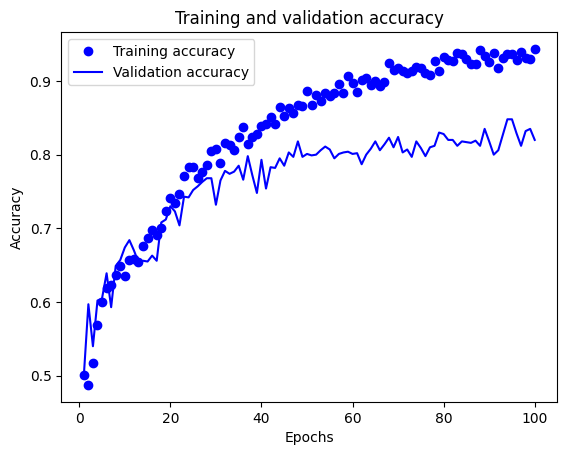

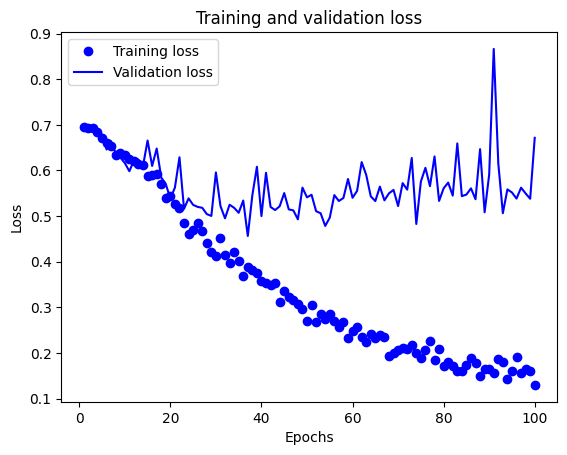

In [17]:
accuracy_1500 = history_1500.history["accuracy"]
valac_1500 = history_1500.history["val_accuracy"]
loss_1500 = history_1500.history["loss"]
valloss_1500 = history_1500.history["val_loss"]
epochs = range(1, len(accuracy_1500) + 1)

plt.plot(epochs, accuracy_1500, "bo", label="Training accuracy")
plt.plot(epochs, valac_1500, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss_1500, "bo", label="Training loss")
plt.plot(epochs, valloss_1500, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


**Test Accuracy of model**

In [18]:
test_1500 = keras.models.load_model("convnet_from_scratch_with_augmentation_info.keras")

test_loss, test_acc = test_1500.evaluate(test_data)

print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.4643 - accuracy: 0.7840
Test accuracy: 0.784


### Q3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

**Expanding the training sample to 2000, while maintaining the validation and test sets at their previous size of 500 samples each.**

In [22]:
n_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = n_dir / subset_name / category
        os.makedirs(dir, exist_ok = True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=o_dir / fname,
            dst=dir / fname)

make_subset("train", start_index=500, end_index=2500)
make_subset("validation", start_index=2500, end_index=3000)
make_subset("test", start_index=3000, end_index=3500)

input_2000 = keras.Input(shape=(180, 180, 3))
d_2000 = augmentation(input_2000)
d_2000 = layers.Rescaling(1./255)(d_2000)
d_2000 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(d_2000)
d_2000 = layers.MaxPooling2D(pool_size=2)(d_2000)
d_2000 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(d_2000)
d_2000 = layers.MaxPooling2D(pool_size=2)(d_2000)
d_2000 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(d_2000)
d_2000 = layers.MaxPooling2D(pool_size=2)(d_2000)
d_2000 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(d_2000)
d_2000 = layers.MaxPooling2D(pool_size=2)(d_2000)
d_2000 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(d_2000)
d_2000 = layers.Flatten()(d_2000)
d_2000 = layers.Dropout(0.5)(d_2000)

output_2000 = layers.Dense(1, activation="sigmoid")(d_2000)
model_2000 = keras.Model(inputs=input_2000, outputs=output_2000)

model_2000.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

callback_2000 = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch_with_augmentation_info.keras",save_best_only=True,monitor="val_loss")]

history_2000 = model_2000.fit(train_data,epochs=100,validation_data=valid_data,callbacks=callback_2000)

Epoch 1/100
63/63 [==============================] - 10s 118ms/step - loss: 0.6953 - accuracy: 0.5090 - val_loss: 0.6931 - val_accuracy: 0.4990
Epoch 2/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6935 - accuracy: 0.4795 - val_loss: 0.6931 - val_accuracy: 0.4980
Epoch 3/100
63/63 [==============================] - 4s 60ms/step - loss: 0.6963 - accuracy: 0.5040 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/100
63/63 [==============================] - 6s 86ms/step - loss: 0.6936 - accuracy: 0.4935 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/100
63/63 [==============================] - 8s 122ms/step - loss: 0.6933 - accuracy: 0.4965 - val_loss: 0.6918 - val_accuracy: 0.5430
Epoch 6/100
63/63 [==============================] - 6s 82ms/step - loss: 0.6920 - accuracy: 0.5055 - val_loss: 0.6872 - val_accuracy: 0.5450
Epoch 7/100
63/63 [==============================] - 6s 96ms/step - loss: 0.6920 - accuracy: 0.5110 - val_loss: 0.6862 - val_accuracy: 0.5590
Epo

**Plots for loss and accuracy during training**


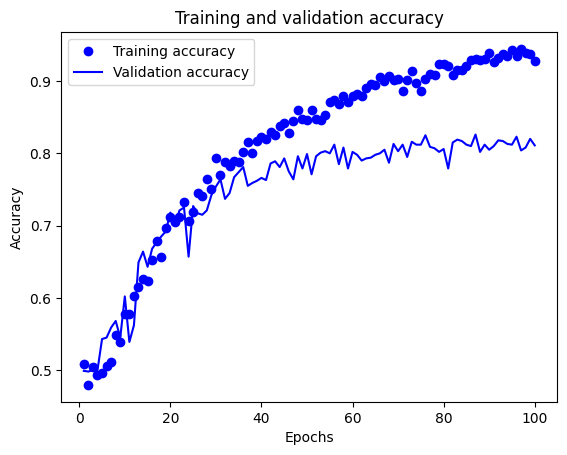

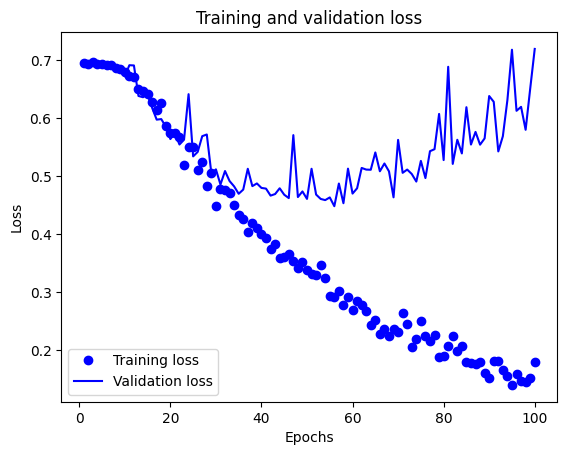

In [23]:
accuracy_2000 = history_2000.history["accuracy"]
valac_2000 = history_2000.history["val_accuracy"]
loss_2000 = history_2000.history["loss"]
valloss_2000 = history_2000.history["val_loss"]
epochs = range(1, len(accuracy_2000) + 1)

plt.plot(epochs, accuracy_2000, "bo", label="Training accuracy")
plt.plot(epochs, valac_2000, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss_2000, "bo", label="Training loss")
plt.plot(epochs, valloss_2000, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


**Test Accuracy of the model**

In [24]:
test_2000 = keras.models.load_model("convnet_from_scratch_with_augmentation_info.keras")

test_loss, test_acc = test_2000.evaluate(test_data)

print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 55ms/step - loss: 0.4756 - accuracy: 0.7950
Test accuracy: 0.795


### Q4. Repeat Steps 1-3, but now using a pretrained network.**

**The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.**

**Instantiating the VGG16 convolutional base**

In [25]:
convoluted_b = keras.applications.vgg16.VGG16(weights="imagenet",include_top=False,input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [26]:
convoluted_b.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**Pretrained model for feature extraction without data augmentation**

In [27]:
def get_features_and_labels(dataset):
    all_feature = []
    all_label = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = convoluted_b.predict(preprocessed_images)
        all_feature.append(features)
        all_label.append(labels)
    return np.concatenate(all_feature), np.concatenate(all_label)

train_features, train_labels = get_features_and_labels(train_data)
val_features, val_labels = get_features_and_labels(valid_data)
test_features, test_labels = get_features_and_labels(test_data)

1/1 [==============================] - 0s 19ms/step


In [28]:
train_features.shape

(2000, 5, 5, 512)

**Model Fitting**

In [29]:
input_6000 = keras.Input(shape=(5, 5, 512))

d_6000 = layers.Flatten()(input_6000)
d_6000 = layers.Dense(256)(d_6000)
d_6000 = layers.Dropout(0.5)(d_6000)

output_6000 = layers.Dense(1, activation="sigmoid")(d_6000)

model_6000 = keras.Model(input_6000, output_6000)
model_6000.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

callback_6000 = [keras.callbacks.ModelCheckpoint(filepath="feature_extraction.keras",save_best_only=True,monitor="val_loss")]

history_6000 = model_6000.fit(train_features, train_labels,epochs=100,validation_data=(val_features, val_labels),callbacks=callback_6000)

Epoch 1/100
63/63 [==============================] - 2s 12ms/step - loss: 16.1286 - accuracy: 0.9180 - val_loss: 5.8465 - val_accuracy: 0.9650
Epoch 2/100
63/63 [==============================] - 0s 5ms/step - loss: 2.7064 - accuracy: 0.9795 - val_loss: 8.9551 - val_accuracy: 0.9540
Epoch 3/100
63/63 [==============================] - 0s 8ms/step - loss: 2.0651 - accuracy: 0.9850 - val_loss: 4.8202 - val_accuracy: 0.9710
Epoch 4/100
63/63 [==============================] - 0s 8ms/step - loss: 0.8275 - accuracy: 0.9930 - val_loss: 4.5501 - val_accuracy: 0.9740
Epoch 5/100
63/63 [==============================] - 0s 5ms/step - loss: 0.6588 - accuracy: 0.9915 - val_loss: 6.7217 - val_accuracy: 0.9710
Epoch 6/100
63/63 [==============================] - 0s 5ms/step - loss: 1.0188 - accuracy: 0.9940 - val_loss: 5.5107 - val_accuracy: 0.9750
Epoch 7/100
63/63 [==============================] - 0s 7ms/step - loss: 0.4168 - accuracy: 0.9965 - val_loss: 6.8885 - val_accuracy: 0.9700
Epoch 8/100

**Plot for loss and accuracy during training**

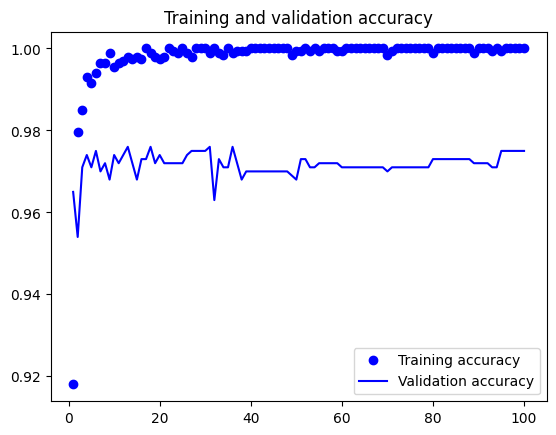

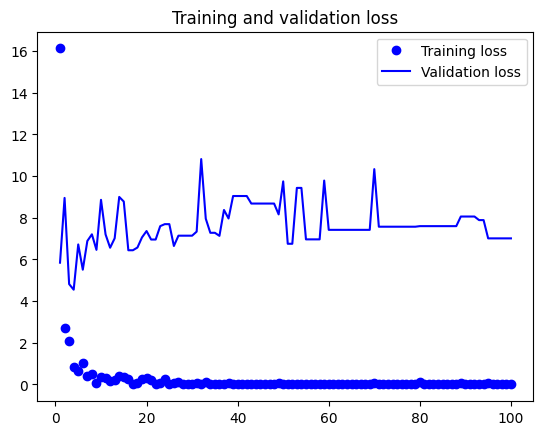

In [30]:
accuracy_6000 = history_6000.history["accuracy"]
valac_6000 = history_6000.history["val_accuracy"]
loss_6000 = history_6000.history["loss"]
valloss_6000 = history_6000.history["val_loss"]

epochs = range(1, len(accuracy_6000) + 1)
plt.plot(epochs, accuracy_6000, "bo", label="Training accuracy")
plt.plot(epochs, valac_6000, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss_6000, "bo", label="Training loss")
plt.plot(epochs, valloss_6000, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Freezing and Unfreezing the Pre-trained Convolutional Base**

In [31]:
convoluted_base = keras.applications.vgg16.VGG16(weights="imagenet",include_top=False)

convoluted_base.trainable = False
convoluted_base.trainable = True

print("This is the number of trainable weights ""before freezing the conv base:", len(convoluted_base.trainable_weights))

convoluted_base.trainable = False

print("This is the number of trainable weights ""after freezing the conv base:", len(convoluted_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


**Model is now performing with a classifier and agumentation to convulation base**

In [32]:
augmented_cb = keras.Sequential([layers.RandomFlip("horizontal"),layers.RandomRotation(0.1),layers.RandomZoom(0.2),])

input_cb = keras.Input(shape=(180, 180, 3))
d_cb = augmented_cb(input_cb)
d_cb =keras.layers.Lambda(lambda x: keras.applications.vgg16.preprocess_input(x))(d_cb)
d_cb = convoluted_base(d_cb)
d_cb = layers.Flatten()(d_cb)
d_cb = layers.Dense(256)(d_cb)
d_cb = layers.Dropout(0.5)(d_cb)

output_cb = layers.Dense(1, activation="sigmoid")(d_cb)

modelx = keras.Model(input_cb, output_cb)

modelx.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

callback_cb = [keras.callbacks.ModelCheckpoint(filepath="features_extraction_with_augmentation2.keras",save_best_only=True,monitor="val_loss")]

history_cb = modelx.fit(train_data,epochs=100,validation_data=valid_data,callbacks=callback_cb)

Epoch 1/100
63/63 [==============================] - 13s 162ms/step - loss: 20.5766 - accuracy: 0.8920 - val_loss: 5.1385 - val_accuracy: 0.9700
Epoch 2/100
63/63 [==============================] - 11s 168ms/step - loss: 8.1243 - accuracy: 0.9470 - val_loss: 3.9042 - val_accuracy: 0.9700
Epoch 3/100
63/63 [==============================] - 10s 163ms/step - loss: 5.1447 - accuracy: 0.9560 - val_loss: 3.7450 - val_accuracy: 0.9720
Epoch 4/100
63/63 [==============================] - 10s 152ms/step - loss: 5.0218 - accuracy: 0.9580 - val_loss: 3.9683 - val_accuracy: 0.9750
Epoch 5/100
63/63 [==============================] - 10s 152ms/step - loss: 4.7088 - accuracy: 0.9620 - val_loss: 5.9792 - val_accuracy: 0.9710
Epoch 6/100
63/63 [==============================] - 10s 154ms/step - loss: 3.8578 - accuracy: 0.9680 - val_loss: 4.2969 - val_accuracy: 0.9730
Epoch 7/100
63/63 [==============================] - 11s 177ms/step - loss: 3.6115 - accuracy: 0.9685 - val_loss: 5.7969 - val_accuracy

**Plot for loss and accuracy during training**





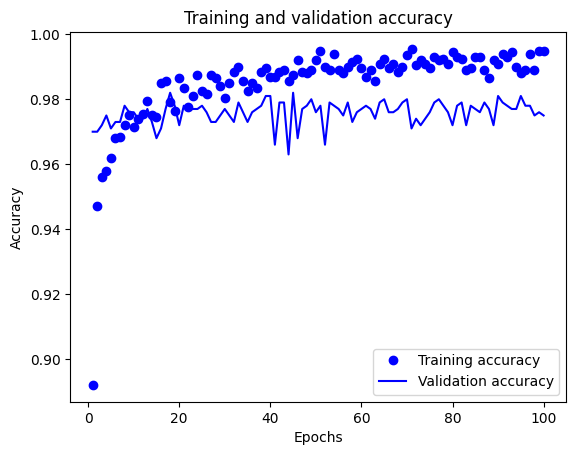

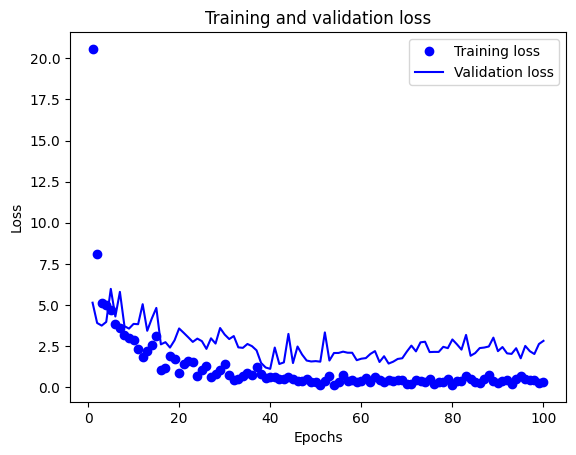

In [33]:
accuracy_cb = history_cb.history["accuracy"]
valac_cb = history_cb.history["val_accuracy"]
loss_cb = history_cb.history["loss"]
valloss_cb = history_cb.history["val_loss"]
epochs = range(1, len(accuracy_cb) + 1)

plt.plot(epochs, accuracy_cb, "bo", label="Training accuracy")
plt.plot(epochs, valac_cb, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss_cb, "bo", label="Training loss")
plt.plot(epochs, valloss_cb, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


**Test Accuracy of the model**

In [34]:
test_cb = keras.models.load_model("features_extraction_with_augmentation2.keras",safe_mode=False)

test_loss, test_acc = test_cb.evaluate(test_data)

print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 92ms/step - loss: 2.5513 - accuracy: 0.9720
Test accuracy: 0.972


**Fine-tuning a pretrained model**

In [35]:
convoluted_base.trainable = True

for layer in convoluted_base.layers[:-4]:
    layer.trainable = False

modelx.compile(loss="binary_crossentropy",optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),metrics=["accuracy"])

callback_tuning = [keras.callbacks.ModelCheckpoint(filepath="fine_tuning.keras",save_best_only=True,monitor="val_loss")]

history_tuning = modelx.fit(train_data,epochs=100,validation_data=valid_data,callbacks=callback_tuning)

Epoch 1/100
63/63 [==============================] - 15s 196ms/step - loss: 0.1940 - accuracy: 0.9930 - val_loss: 2.2366 - val_accuracy: 0.9770
Epoch 2/100
63/63 [==============================] - 11s 173ms/step - loss: 0.6779 - accuracy: 0.9905 - val_loss: 2.6628 - val_accuracy: 0.9750
Epoch 3/100
63/63 [==============================] - 11s 171ms/step - loss: 0.2821 - accuracy: 0.9945 - val_loss: 2.3263 - val_accuracy: 0.9770
Epoch 4/100
63/63 [==============================] - 11s 175ms/step - loss: 0.4136 - accuracy: 0.9925 - val_loss: 2.4800 - val_accuracy: 0.9790
Epoch 5/100
63/63 [==============================] - 12s 195ms/step - loss: 0.2499 - accuracy: 0.9950 - val_loss: 2.2421 - val_accuracy: 0.9770
Epoch 6/100
63/63 [==============================] - 11s 168ms/step - loss: 0.3156 - accuracy: 0.9940 - val_loss: 2.3282 - val_accuracy: 0.9800
Epoch 7/100
63/63 [==============================] - 10s 162ms/step - loss: 0.1558 - accuracy: 0.9960 - val_loss: 2.3889 - val_accuracy:

**Plot for loss and accuracy during training**





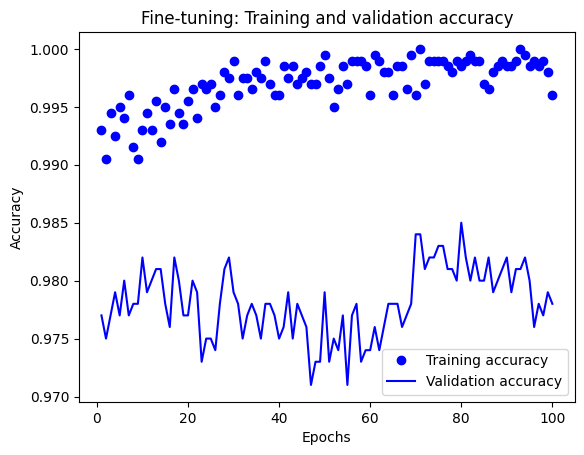

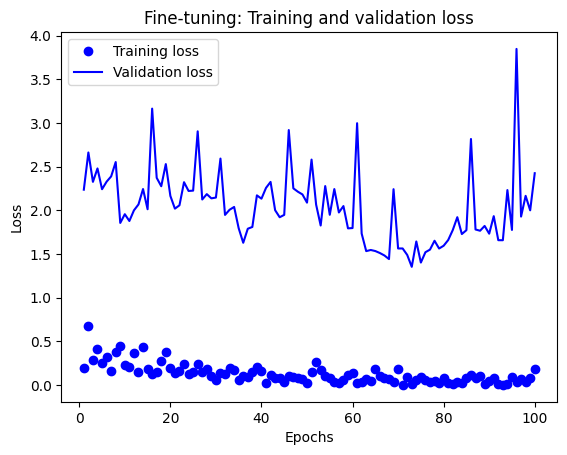

In [36]:
accuracy_tuning = history_tuning.history["accuracy"]
val_tuning = history_tuning.history["val_accuracy"]
loss_tuning = history_tuning.history["loss"]
val_loss_tuning = history_tuning.history["val_loss"]
epochs = range(1, len(accuracy_tuning) + 1)

plt.plot(epochs, accuracy_tuning, "bo", label="Training accuracy")
plt.plot(epochs, val_tuning, "b", label="Validation accuracy")
plt.title("Fine-tuning: Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss_tuning, "bo", label="Training loss")
plt.plot(epochs, val_loss_tuning, "b", label="Validation loss")
plt.title("Fine-tuning: Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


**Test Accuracy of model**

In [37]:
test_tuning = keras.models.load_model("fine_tuning.keras",safe_mode=False)

test_loss, test_acc = test_tuning.evaluate(test_data)

print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 93ms/step - loss: 2.3060 - accuracy: 0.9770
Test accuracy: 0.977
